In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [3]:
from src.utils.submissions_graph_transform import *
from src.models.embedding import *


/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_parquet("../data/all_submissions.parquet")
G, student_paths = submissions_to_graph_for_all_students(df)

In [5]:
node_embeddings = embed_graph(G)


Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 113.53it/s]


In [6]:

from src.models.sequence_model import train_sequence_model

In [7]:
(trained_model, student_sequence_embeddings) = train_sequence_model(student_paths, node_embeddings)

/Users/nickzheng/Documents/individual-project/src/models/sequence_model.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  self.sequences = torch.FloatTensor(sequence_data)


Epoch 1/10, Loss: 0.0034
Epoch 2/10, Loss: 0.0023
Epoch 3/10, Loss: 0.0019
Epoch 4/10, Loss: 0.0018
Epoch 5/10, Loss: 0.0017
Epoch 6/10, Loss: 0.0017
Epoch 7/10, Loss: 0.0017
Epoch 8/10, Loss: 0.0017
Epoch 9/10, Loss: 0.0016
Epoch 10/10, Loss: 0.0016


In [ ]:
for stu, embedding in student_sequence_embeddings.items():
    print(f"Student: {stu}, Embedding: {embedding[:5]}...")

In [8]:
from src.models.clustering import perform_clustering, find_optimal_clusters, visualize_clusters

/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kme

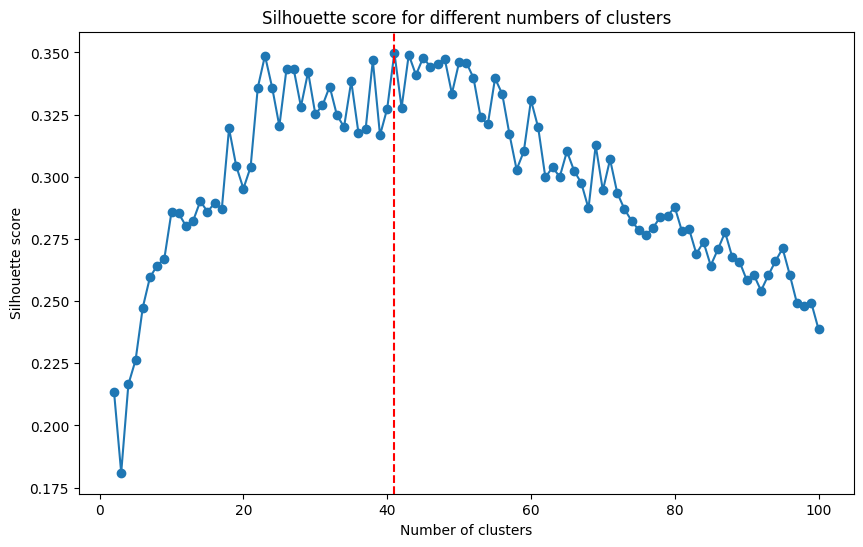

Best k number: 41


In [13]:
# Find optimal number of clusters
optimal_clusters = find_optimal_clusters(
    student_sequence_embeddings, 
    max_clusters=100, 
    random_state=42
)

print(f"Best k number: {optimal_clusters}")